## Optunaで学ぶベイズハイパーパラメータチューニング超入門 – 第3回: ベイズ最適化とは？ Optunaのアルゴリズムの背後にあるもの –

url: https://www.salesanalytics.co.jp/datascience/datascience193/

    ハイパーパラメータのチューニングにおいて、ベイズ最適化は鍵となる役割を果たしますが、その背後にはどのような原理やアルゴリズムが働いているのでしょうか。

    前回、Optunaの基本的な使い方やその背後にある技術的特徴について触れました。Optunaは、ユーザーが直感的にかつ効率的にハイパーパラメータのチューニングを行えるようデザインされています。

    url: https://www.salesanalytics.co.jp/datascience/datascience192/

    しかし、Optunaの背後にある最適化の技術的側面は、ベイズ最適化という広く知られた理論に基づいています。
    ベイズ最適化は、近年、多くの研究や実応用で注目されており、その効率性や精度の高さから多岐にわたる領域での利用が進められています。

    今回は、このベイズ最適化の基本原理や、それがどのようにOptunaの中で利用されているのかを、最低限の数式のみで説明します。

# ベイズ最適化の基本原理
    ベイズ最適化は、確率的最適化手法の一つとして知られ、特にハイパーパラメータのチューニングにおいて非常に効果的です。

    その名の通り、ベイズの定理を活用して、既知のデータや事前知識を基に次の試行点を効率的に選択することが特徴です。

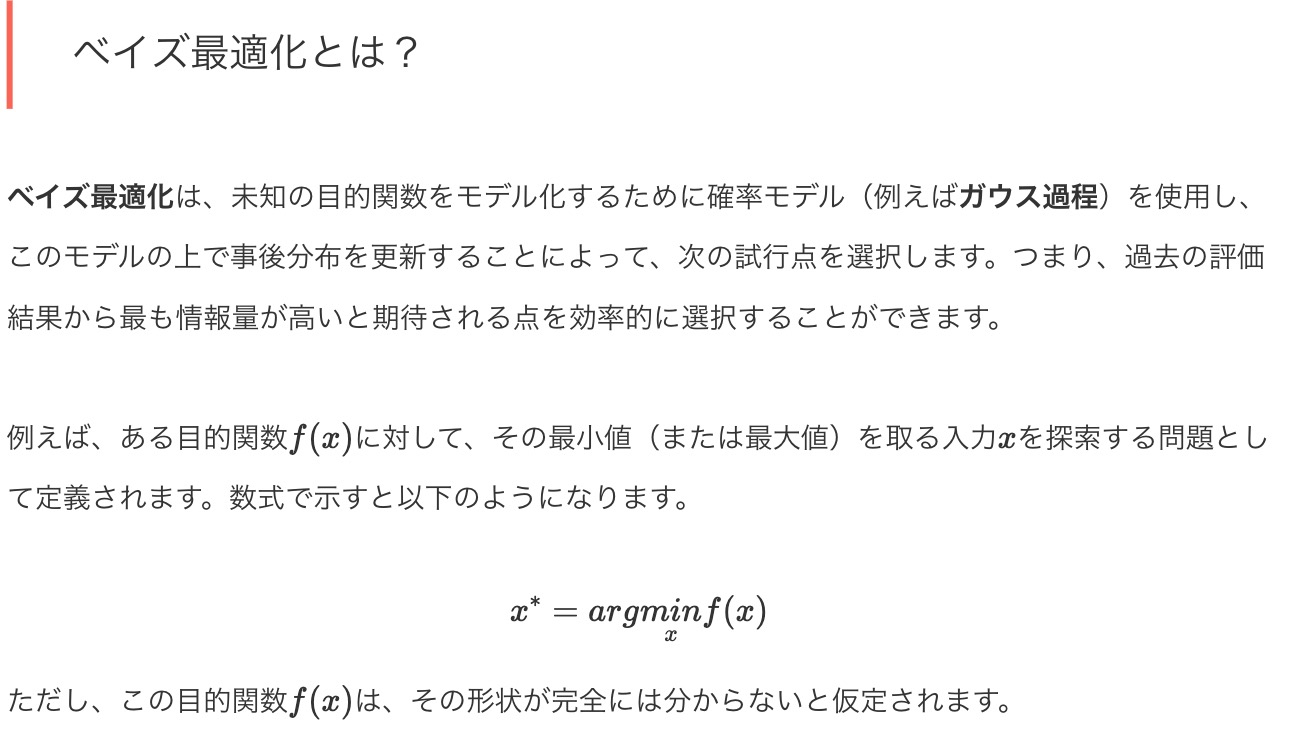

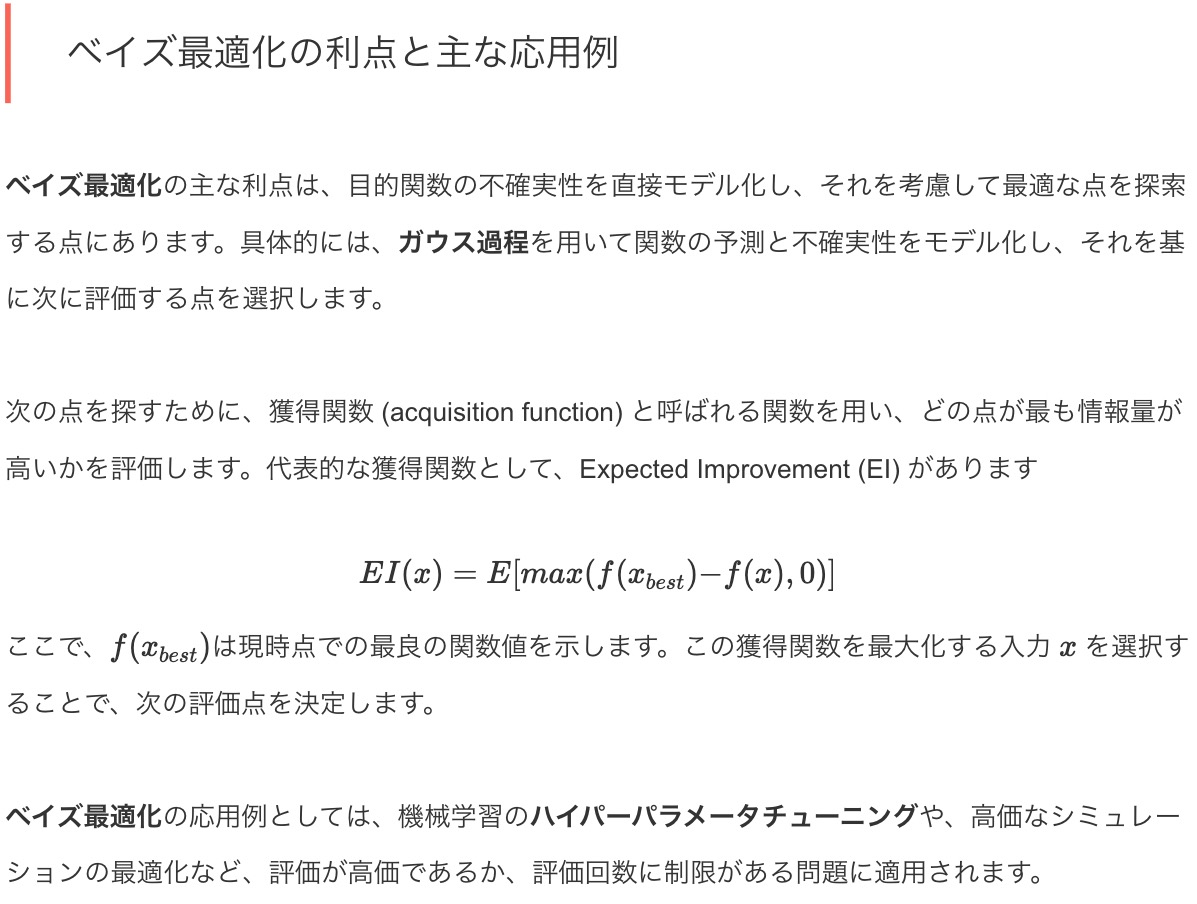

## 主なハイパーパラメータチューニング手法
    ベイズ最適化を用いたハイパーパラメータチューニングは、機械学習のモデルの性能を向上させるための効果的な方法の一つです。

    以下に、ベイズ最適化に関連する主な手法やアプローチを挙げます。

    ガウス過程 (Gaussian Process, GP):
    ・ガウス過程は非常に人気のあるベイズ最適化の手法の一つです。
    ・未知の関数の事後分布をモデル化するためにガウス過程を使用します。

    TPE (Tree-structured Parzen Estimator):
    ・TPEは、ハイパーパラメータの空間を確率的にモデル化する手法です。
    ・与えられたハイパーパラメータの設定の下での目的関数の期待値を推定します。

    MCMC (Markov Chain Monte Carlo):
    ・MCMCは、ハイパーパラメータ空間においてサンプリングするための手法で、ベイズ最適化のコンテキストで使われることがあります。
    ・サンプリングに基づくアプローチで、効率的にハイパーパラメータ空間を探索します。
    
    主流は、ガウス過程です。MCMCは単独で用いることもできますが、ガウス過程と合わせて使うケースが多いです。

    では、Optunaはどうかというと、OptunaはTPEです。

    先ず、主流のガウス過程の方法を説明し、次にOptunaで利用されているTPEについて簡単に説明してきます。

## ガウス過程入門
    ガウス過程 (Gaussian Process; GP) は、ベイズ最適化の中核を成す確率的モデリング技術の1つです。

## ガウス過程とは？
    ガウス過程はノンパラメトリック推定の一種で、データの複雑な構造を捉えるために、固定された関数の形状や構造を持たず観測データに応じて関数の形が変わります。

    ガウス過程の関数の形状は、データと選択されたカーネルによってのみ定義されます。そのため、適切なカーネルを選択する必要があります。

    ガウス過程は、特に少量のデータに対して、複雑な関数の形状を推定する場面で非常に有効です。
    ベイズ最適化のような、関数の不確実性を考慮しながら効率的なサンプリングを行うためにガウス過程が利用されます。

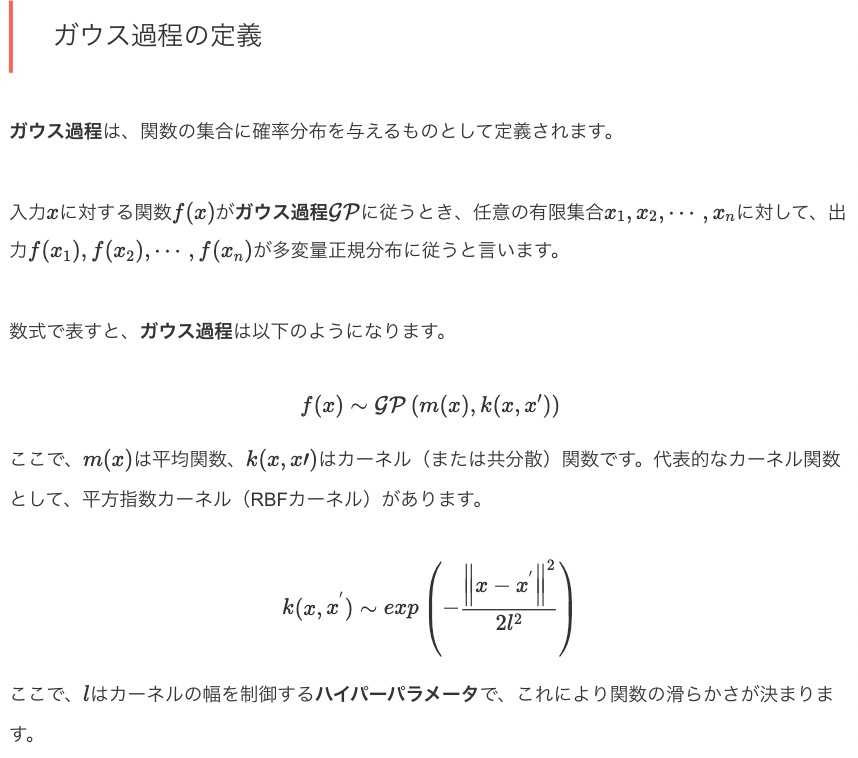

## ガウス過程による関数の推定
    ガウス過程（GP）を使用して関数を推定するというのは、実際の関数を知らないが、ある入力点での関数の値を観測できるという状況において、未知の入力点での関数の値を予測することを意味します。

    要は、ガウス過程を用いると、既知のデータ点に基づいて、新しい入力点x∗での関数f(x∗)の事後分布を得ることができます。

    以下は、ガウス過程を用いた関数の推定の基本的なステップです。

    1. 事前分布の設定: この時点では、関数の形については何も知らないと仮定します。事前分布は、通常、平均関数と共分散関数（またはカーネル）で定義されたガウス過程です。
    2. データの観測: いくつかの入力点で関数の値を観測します。これらの観測値は、後のステップで関数の形を推定するために使用されます。
    3. 事後分布の計算: 観測データを使用して、関数に関する事前分布を更新し事後分布を計算します。事後分布もまたガウス過程として表現されます。
    4. 未知の入力点での予測: 事後分布を使用して、未知の入力点での関数の値とその不確実性を予測します。ガウス過程による予測は、平均と分散で表されるのが一般的です。

    事前分布:
    事前分布では、データがまだ考慮されていないため、平均関数とカーネル（または共分散）関数は事前知識や特定の仮定に基づいて設定されます。
    多くの場合、事前分布の平均関数は単純にゼロ関数（すべての入力点で0の値を取る関数）として設定されることが一般的です。

    事後分布:
    データが観測された後、事後分布は事前分布を更新するために計算されます。具体的には、観測データとカーネル関数を使用して、新しい平均関数とカーネル関数が導出されます。
    この更新は、ガウス過程の再生性と、観測データがガウスノイズを伴って得られるという仮定に基づいています。

## ハイパーパラメータチューニングの流れ
    ガウス過程（GP）を活用したハイパーパラメータチューニングの流れは以下のようになります。

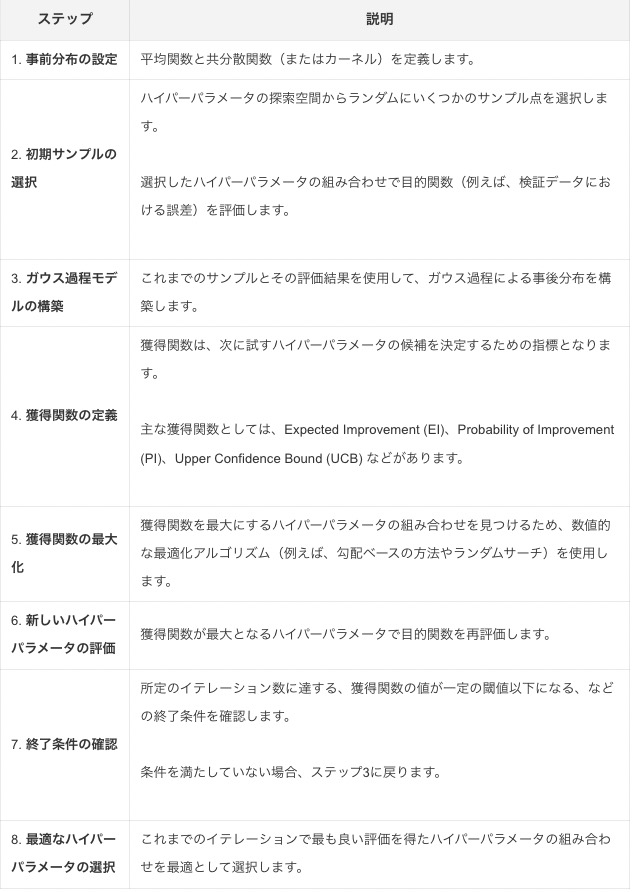

    この流れを繰り返すことで、目的関数を最小化（または最大化）するハイパーパラメータの組み合わせを効率的に探索することができます。
    ガウス過程は関数の不確実性をモデル化しているため、未評価のハイパーパラメータの組み合わせでも、その評価結果を予測することが可能です。これにより、効率的な探索が可能となります。

## Optunaのベイズ最適化アルゴリズムTPE
    Optunaは高度な自動ハイパーパラメータ最適化ツールとして広く知られていますが、その背後にはベイズ最適化のアイディアが利用されています。

    特に、OptunaはTree-structured Parzen Estimator (TPE)というアルゴリズムを採用しています。

## Optunaが採用するベイズ最適化の特徴
    ベイズ最適化は、前の実験結果を基に次に試すべきハイパーパラメータを選択します。Optunaでは、TPEというアルゴリズムを使用してこの選択を行います。

    TPEは、ベイズ最適化の一形態であり、高速かつ高精度なハイパーパラメータ探索を実現しています。

    TPEは、過去の試行結果を２つのモデル、すなわち成功した試行のモデルと失敗した試行のモデルに分けて学習します。
    これにより、次に試すべきハイパーパラメータの提案が非常に効率的に行われます。



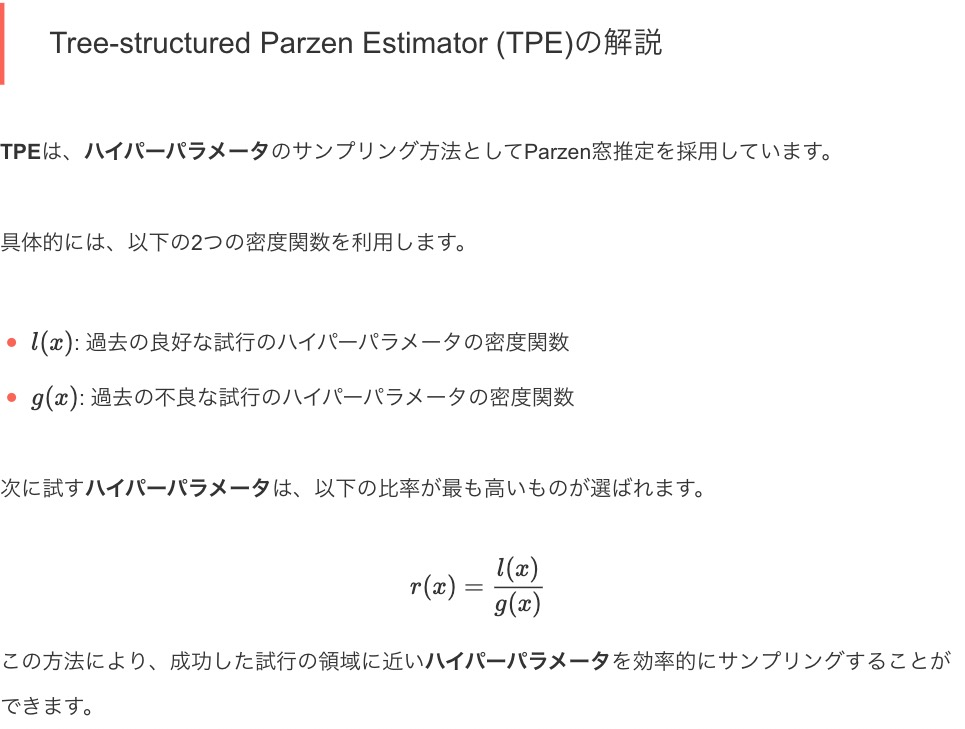

## ハイパーパラメータチューニングの流れ
    OptunaのTPE（Tree-structured Parzen Estimator）を活用したハイパーパラメータチューニングの流れは以下の通りです。

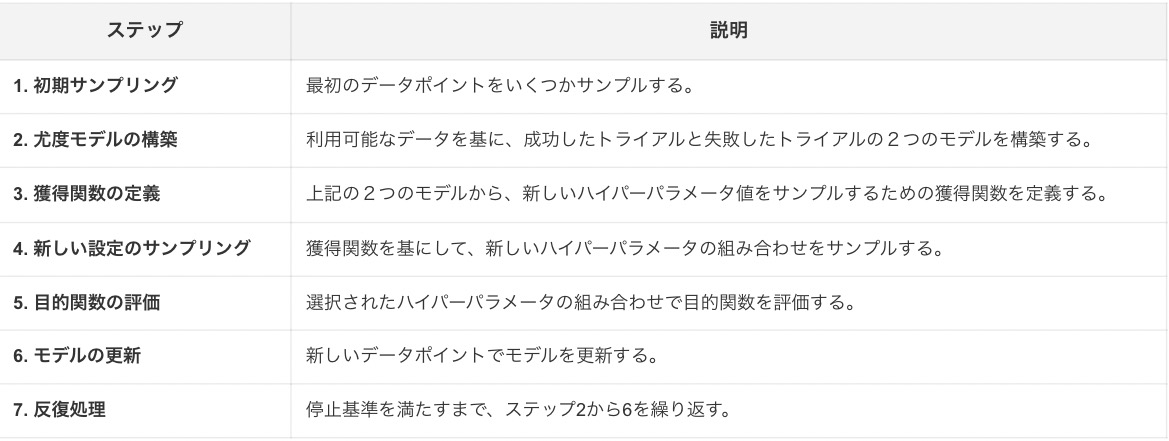

    TPEアルゴリズムはベイズ最適化のアイディアを採用しつつ、特定のモデリング手法（ツリー構造のParzen窓推定）を採用しており、ガウス過程とは異なるアプローチを取っています。
    OptunaでのTPEの利用は非常に効果的であり、多くのタスクにおいて高速かつ正確なハイパーパラメータの探索を実現しています。

## TPE（Optuna） vs ガウス過程
    Tree-structured Parzen Estimator（TPE）とガウス過程（GP）は、ハイパーパラメータ最適化のための異なるアプローチを持っています。

    以下に、それぞれのメリットとデメリットを、簡単にまとめました。

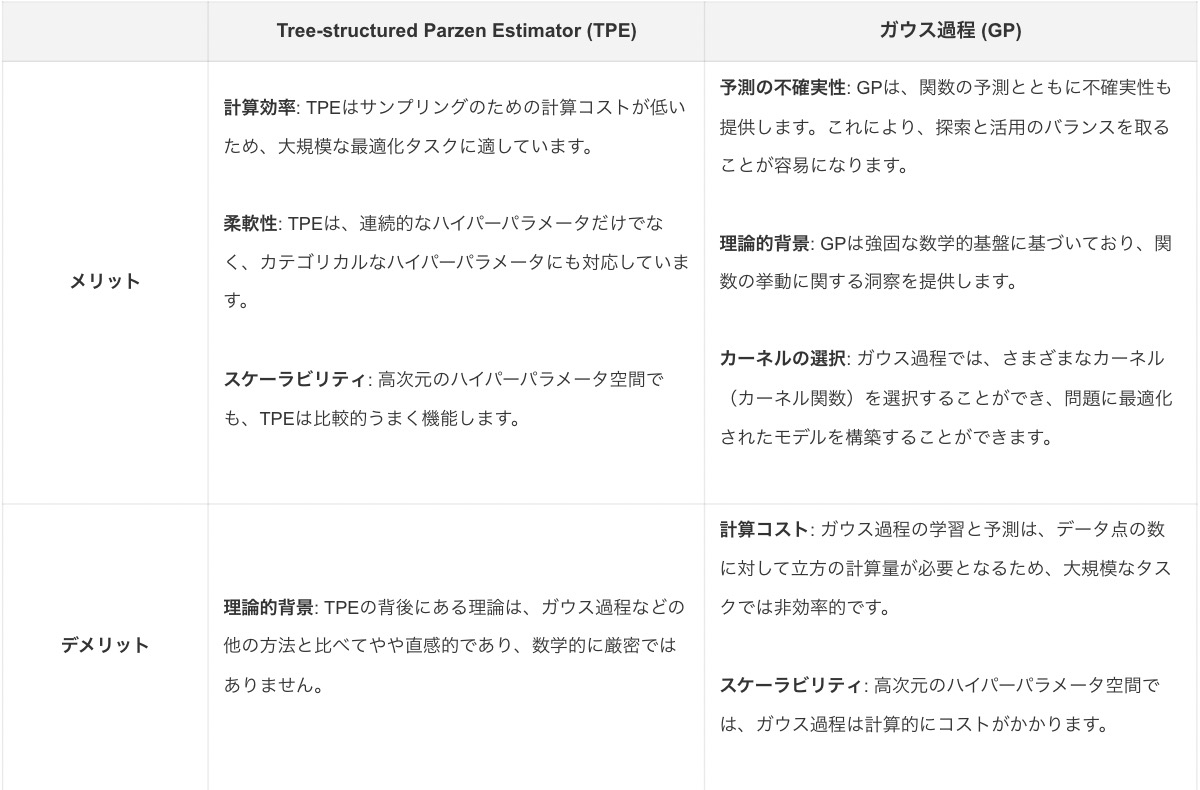

    TPEとガウス過程はそれぞれの利点と欠点があり、最適化するタスクや目的に応じて適切な方法を選択する必要があります。

## まとめ
    今回は、このベイズ最適化の基本原理や、それがどのようにOptunaの中で利用されているのかを、最低限の数式のみで説明しました。
    
    ・ベイズ最適化の概念とその重要性
    ・ガウス過程の基礎と、ハイパーパラメータチューニング
    ・Optunaのベイズ最適化におけるアルゴリズムTree-structured Parzen Estimator (TPE)について

    ただ、ハイパーパラメータチューニングは手作業でも自動化でも非常に時間が掛かるものです。

    では、Optunaではどのように時間短縮を図っているのでしょうか。

    次回は、「チューニング時間の短縮に貢献するプルーニング」というお話しをします。
